In [1]:
## importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading Data Set
cars = pd.read_csv('car_age_price.csv')
cars.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
## Finding the number of rows and columns
cars.shape

(112, 2)

In [4]:
## finding the statistical summary
cars.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
## Finding more info about loaded data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
Year     112 non-null int64
Price    112 non-null int64
dtypes: int64(2)
memory usage: 1.8 KB


## Missing Values Handiling

In [6]:
cars.isna().sum()

Year     0
Price    0
dtype: int64

There is no missing values

## Correlation matrix

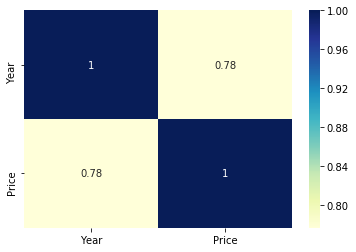

In [7]:
corr_matrix =cars.corr()
sns.heatmap(corr_matrix,annot = True, cmap = 'YlGnBu')

## Managing Outliers

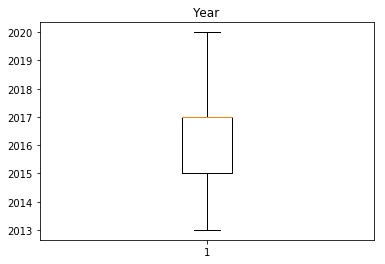

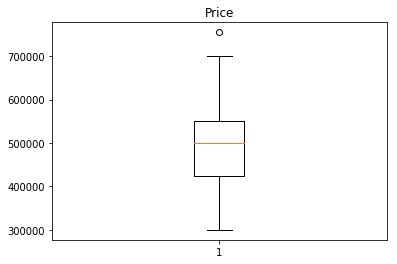

In [8]:
for i in ['Year', 'Price']:
    plt.figure()
    plt.boxplot(cars[i])
    plt.title(i)

In [9]:
## finding Q1,Q2,Q3
Q1 = np.percentile(cars['Price'],25,interpolation = 'midpoint')
Q2 = np.percentile(cars['Price'],50,interpolation = 'midpoint')
Q3 = np.percentile(cars['Price'],75,interpolation = 'midpoint')

In [10]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [11]:
cars['Price'].median()

500000.0

In [12]:
## finding IQR
IQR = Q3-Q1

In [13]:
## finding lowe and upper limit
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

In [14]:
## finding outlier
outlier = []
for x in cars['Price']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x) 

In [15]:
outlier

[755000]

In [16]:
## finding indices of lower outlier
ind1  = cars['Price'] < low_lim
cars.loc[ind1].index

Int64Index([], dtype='int64')

There is no lower outlier

In [17]:
## finding indices of upper outlier
ind2  = cars['Price'] > up_lim
cars.loc[ind2].index

Int64Index([1], dtype='int64')

There is one upper outlier

In [18]:
## Droping the upper outlier
cars.drop([1],inplace = True)

In [19]:
## checking oulier droped or not
ind2  = cars['Price'] > up_lim
cars.loc[ind2].index

Int64Index([], dtype='int64')

In [20]:
## Splitting x and y values for model creation
x = cars.drop(['Price'],axis = 1)
y = cars['Price']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [22]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x_train,y_train)
predictions = model.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error = ', mean_squared_error(y_test,predictions))
print('R squared value = ', r2_score(y_test,predictions))

Mean squared error =  2360736941.0488067
R squared value =  0.7087665874512326


## Standard Scaling

In [24]:
x.describe()

,Year
count,111.000000
mean,2016.648649
std,1.621720
min,2013.000000
25%,2015.000000
50%,2017.000000
75%,2017.000000
max,2020.000000


In [25]:
x1 = x

In [26]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x1 = std_scaler.fit_transform(x1)

C:\Users\ARAVIND R\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ARAVIND R\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
x1 = pd.DataFrame(x1)

In [28]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y,random_state = 42, test_size = 0.2)

In [29]:
from sklearn.linear_model import LinearRegression
linear_regression1 = LinearRegression()
model1 = linear_regression.fit(x1_train,y1_train)
predictions1 = model1.predict(x1_test)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error = ', mean_squared_error(y1_test,predictions1))
print('R squared value = ', r2_score(y1_test,predictions1))

Mean squared error =  2360736941.0489936
R squared value =  0.7087665874512095


## Normalization 

In [31]:
x2 = x

In [32]:
from sklearn.preprocessing import normalize
x2 = normalize(x2)

In [33]:
x2 = pd.DataFrame(x2)

In [34]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y,random_state = 42, test_size = 0.2)

In [35]:
from sklearn.linear_model import LinearRegression
linear_regression2 = LinearRegression()
model2 = linear_regression.fit(x2_train,y2_train)
predictions2 = model2.predict(x2_test)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error = ', mean_squared_error(y2_test,predictions2))
print('R squared value = ', r2_score(y2_test,predictions2))

Mean squared error =  8692883493.54455
R squared value =  -0.07240162200752831
